# Structure

- Imports
- Read and clean data: Load, drop irrelevant rows + columns, show data (head())
- Explore datasets: Static and interactive plots for each dataset
- Merge datasets
- Analysis: Summary statistics
- Conclusion: 


# Data

Indkomst vs. middellevetid i kommunerne

# Figurer
- Interaktive figurer på kommuneniveau
- Scatter plot af middellevetid vs. gennemsnitlig indkomst i kommunerne
- Husk at sortere regioner og landsdele fra

Indkomst:
https://www.statbank.dk/statbank5a/default.asp?w=1920


Livskvalitet:
https://www.statbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=LIVO1&PLanguage=0&PXSId=0&wsid=cftree

**Import packages**

In [1]:
import pandas as pd
import pydst
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib_venn import venn2
import ipywidgets as widgets
import project1_functions

## Read data from DST

In [2]:
Dst = pydst.Dst(lang='en')

# a. Income dataset
income = Dst.get_data(table_id='INDKP105', variables={'OMRÅDE':['*'], 'ENHED':['118'], 'KOEN':['MOK'], 'ALDER1':['00'],
                                                     'INDKINTB':['000'], 'Tid':['*']})

# b. Life expectancy dataset
life = Dst.get_data(table_id='LIVO1', variables={'AKTP':['O1'], 'OMRÅDE':['*'], 'Tid':['*']})

In [3]:
income.head()

,OMRÅDE,ENHED,KOEN,ALDER1,INDKINTB,TID,INDHOLD
0,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,244336
1,Herning,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,279723
2,Frederikshavn,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,272244
3,Skive,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,265916
4,Province Vestjylland,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,279867


In [4]:
life.head()

,AKTP,OMRÅDE,TID,INDHOLD
0,Life expectancy (years),All Denmark,2008,78.5
1,Life expectancy (years),Region Nordjylland,2008,78.5
2,Life expectancy (years),Region Midtjylland,2008,79.0
3,Life expectancy (years),Region Syddanmark,2008,78.8
4,Life expectancy (years),Region Hovedstaden,2008,78.2


## Clean data

**Rename variables**

In [5]:
# Make dictionary for renaming columns
# a. Income dataset
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['INDHOLD'] = 'income'
columns_dict['TID'] = 'year'

income.rename(columns = columns_dict, inplace = True)

# b. Life expectancy dataset
columns_dict_life = {}
columns_dict_life['OMRÅDE'] = 'municipality'
columns_dict_life['INDHOLD'] = 'life expectancy'
columns_dict_life['TID'] = 'year'

life.rename(columns = columns_dict_life, inplace = True)

**Drop irrelevant variables**

In [6]:
income.drop(['ENHED', 'KOEN', 'ALDER1', 'INDKINTB'], axis=1, inplace=True)
life.drop(['AKTP'], axis=1, inplace=True)

**Drop irrelevant observations**

In [7]:
# Drop all obsevations that is for regions, provinces, or all of Denmark
# a. Income dataset
I = income.municipality.str.contains('Region')
I |= income.municipality.str.contains('Province')
income = income.loc[I == False] 

# b. Life expectancy dataset
I = life.municipality.str.contains('Region')
I |= life.municipality.str.contains('Province')
life = life.loc[I == False] 

## Explore the two datasets

**Observations in the two datasets**

From the output below, we see that the two datasets have the same number of municipalities. Furthermore, we see that the income dataset has data from the years 1987-2018, where the life expectancy dataset only has data from the years 2008-2018. I.e. the life expectancy dataset is a subset of the income dataset, which is illustrated in the figure plotted below. 

Years in income dataset: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018]
Municipalities in income dataset = 99
Years in life expectancy dataset: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in life expectancy dataset = 99


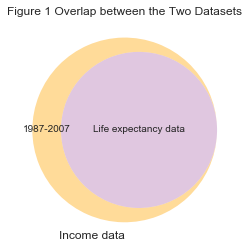

In [8]:
# a. Sort values by municipality and then year
income = income.sort_values(['municipality','year'])
life = life.sort_values(['municipality','year'])

# b. Print number of municipalities and years for each dataset
print(f'Years in income dataset: {income.year.unique()}')
print(f'Municipalities in income dataset = {len(income.municipality.unique())}')
print(f'Years in life expectancy dataset: {life.year.unique()}')
print(f'Municipalities in life expectancy dataset = {len(life.municipality.unique())}')

# c. Plot the overlap of datasets
plt.figure()
plt.title('Figure 1 Overlap between the Two Datasets')
v = venn2(subsets = (4, 0, 10), set_labels = ('Income data', ''), set_colors=('orange', 'blue'))
v.get_label_by_id('100').set_text('1987-2007')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('110').set_text('Life expectancy data')
plt.show()

**Plots of the two datasets**

The figures below show the development in the average income and life expectancy in all of Denmark over the years we have data for. We see that both the income and the life expectancy have been increasing over the periods. The average income had a small drop around 2008-2009, which was expected as this is the years of the financial crisis. The average life expectancy had a sharp increase in 2014, which we are not able to explain. 

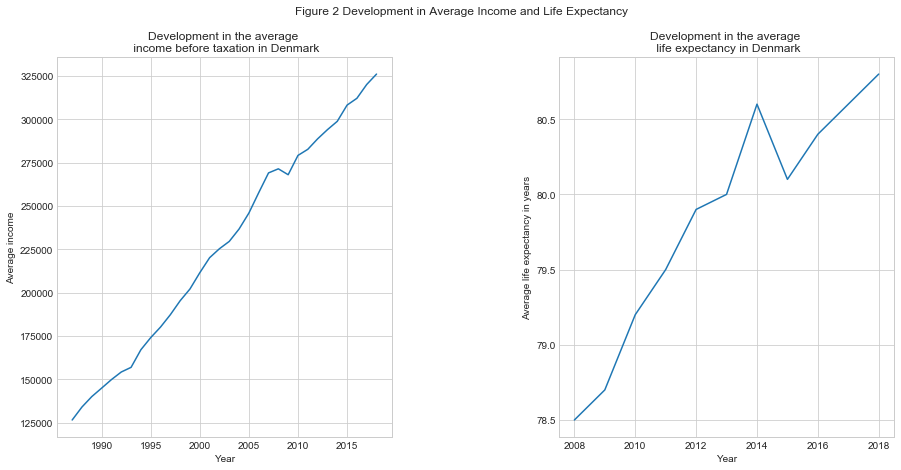

In [9]:
# a. Start static figure with two subplots
f = plt.figure(figsize=(15,7))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

f.suptitle('Figure 2 Development in Average Income and Life Expectancy')
f.subplots_adjust(wspace=0.5, hspace=1)

# b. Add first subplot of average income 
I = income['municipality']=='All Denmark'
avg_income = income.loc[I, 'income']
avg_income = avg_income.astype('float')
year = income.loc[I, 'year']
year = year.astype('float')

ax1.plot(year, avg_income)
ax1.legend('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average income')
ax1.set_title('Development in the average \n income before taxation in Denmark')

# c. Add second subplot of average life expectancy
I = life['municipality']=='All Denmark'
year = life.loc[I, 'year']
year = year.astype('float')
avg_life = life.loc[I, 'life expectancy']
avg_life = avg_life.astype('float')

ax2.plot(year, avg_life)
ax2.legend('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average life expectancy in years')
ax2.set_title('Development in the average \n life expectancy in Denmark')

# d. Show figure
plt.show()

In [10]:
# e. Delete observations for all of Denmark, as we are not using them in the assignment from now on
I = income.municipality.str.contains('All Denmark')
income = income.loc[I == False] 

I = life.municipality.str.contains('All Denmark')
life = life.loc[I == False] 

In [11]:
income

,municipality,year,income
3097,Aabenraa,1987,115880
2907,Aabenraa,1988,122373
2731,Aabenraa,1989,128413
2727,Aabenraa,1990,132820
2596,Aabenraa,1991,139228
...,...,...,...
1322,Ærø,2014,253021
3064,Ærø,2015,254644
3166,Ærø,2016,262654
3281,Ærø,2017,265233


In [12]:
# a. Interactive plot for income
project1_functions.interactive_plot(dataframe=income)

# b. Interactive plot for life expectancy
project1_functions.interactive_plot(dataframe=life)

interactive(children=(Dropdown(description='Municipality', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Albertsl…

interactive(children=(Dropdown(description='Municipality', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Albertsl…

## Merge datasets

We choose to merge the two datasets by inner join, since we only wish to keep the observations which are in both datasets. This is because we are not interested in observations in only one of datasets in the following analysis. I.e. we have kept the blue/purple cicle from Figure 1 above. 

In [13]:
merge_data = pd.merge(income, life, on=['municipality','year'], how='inner')
merge_data.head()

,municipality,year,income,life expectancy
0,Aabenraa,2008,255470,78.2
1,Aabenraa,2009,247369,78.5
2,Aabenraa,2010,258176,78.5
3,Aabenraa,2011,261635,78.8
4,Aabenraa,2012,266148,79.1


## Analysis

## Conclusion